In [4]:
# Import libraries 
import numpy as np 
import pandas as pd 
import matplotlib as plt
from statsmodels.tsa.seasonal import seasonal_decompose 

# Read the AirPassengers dataset 
airline = pd.read_csv('~/Downloads/Data Science/data set/AirPassengers.csv', index_col ='Month', parse_dates = True) 

# Print the first five rows of the dataset 
airline.head() 

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


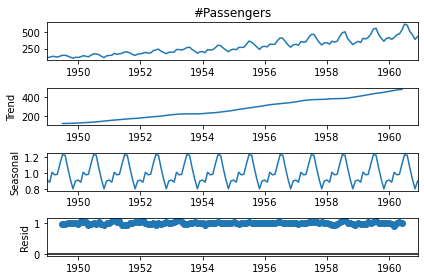

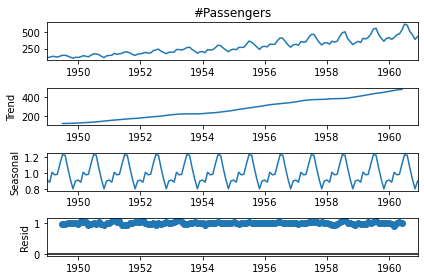

In [5]:
# ETS Decomposition 
result = seasonal_decompose(airline['#Passengers'], model ='multiplicative') 

# ETS plot 
result.plot()

In [15]:
# Import the library 
from pmdarima.arima import auto_arima

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

# Fit auto_arima function
stepwise_fit = auto_arima(airline['#Passengers'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True, d = None, D = 1, trace = True, 
error_action ='ignore', # we don't want to know if an order does not work 
suppress_warnings = True, # we don't want convergence warnings 
stepwise = True) # set to stepwise 

# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=1024.824, BIC=1039.200, Time=0.443 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1033.479, BIC=1039.229, Time=0.018 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1022.316, BIC=1033.817, Time=0.325 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1022.904, BIC=1034.405, Time=0.342 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1031.508, BIC=1034.383, Time=0.019 seconds
Fit ARIMA(1,1,0)x(0,1,0,12) [intercept=True]; AIC=1022.343, BIC=1030.968, Time=0.093 seconds
Fit ARIMA(1,1,0)x(2,1,0,12) [intercept=True]; AIC=1021.137, BIC=1035.513, Time=0.929 seconds
Fit ARIMA(1,1,0)x(2,1,1,12) [intercept=True]; AIC=1017.167, BIC=1034.419, Time=3.105 seconds
Near non-invertible roots for order (1, 1, 0)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(1,1,0)x(1,1,1,12) [intercept=True]; AIC=102

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.920
Date:                            Sun, 31 May 2020   AIC                           1015.841
Time:                                    10:32:32   BIC                           1033.092
Sample:                                         0   HQIC                          1022.850
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.032      0.010      0.992      -0.062       0.063
ma.L1         -0.4243      0.068     -6.209      0.000      -0.558      -0.290
ar.S.L12       0.6656      0.155      4.300      0.000       0.362       0.969
ar.S.L24       0.3330      0.096      3.481      0.000       0.145       0.521
ma.S.L12      -0.9754      1.266     -0.770      0.441      -3.457       1.506
sigma2       110.3992    117.492      0.940      0.347    -119.880     340.679
===================================================================================
Ljung-Box (Q):                       53.12   Jarque-Bera (JB):                 7.57
Prob(Q):                              0.08   Prob(JB):                         0.02
Heteroskedasticity (H):               2.83   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
#Fit ARIMA Model

# Split data
train = airline.iloc[:len(airline)-12] 
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing 

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 

from statsmodels.tsa.statespace.sarimax import SARIMAX 

model = SARIMAX(train['#Passengers'], order = (0, 1, 1), seasonal_order =(2, 1, 1, 12)) 

result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.011
Date:                            Sun, 31 May 2020   AIC                            896.022
Time:                                    10:33:31   BIC                            909.918
Sample:                                01-01-1949   HQIC                           901.665
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2991      0.076     -3.934      0.000      -0.448      -0.150
ar.S.L12       0.7087      0.228      3.109      0.002       0.262       1.155
ar.S.L24       0.2907      0.100      2.903      0.004       0.094       0.487
ma.S.L12      -0.9833      2.567     -0.383      0.702      -6.014       4.047
sigma2        88.0719    208.297      0.423      0.672    -320.182     496.326
===================================================================================
Ljung-Box (Q):                       38.29   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.55   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

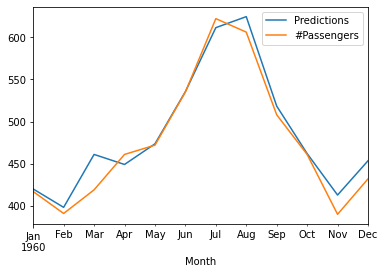

In [17]:
# Predictions ARIMA Model
start = len(train) 
end = len(train) + len(test) - 1

# Predictions for one-year against the test set 
predictions = result.predict(start, end, typ = 'levels').rename("Predictions") 

# plot predictions and actual values 
predictions.plot(legend = True) 
test['#Passengers'].plot(legend = True) 

In [18]:
#MSE and RMSE Values

# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

# Calculate root mean squared error 
rmse(test["#Passengers"], predictions) 

# Calculate mean squared error 
mean_squared_error(test["#Passengers"], predictions) 

292.761866909962

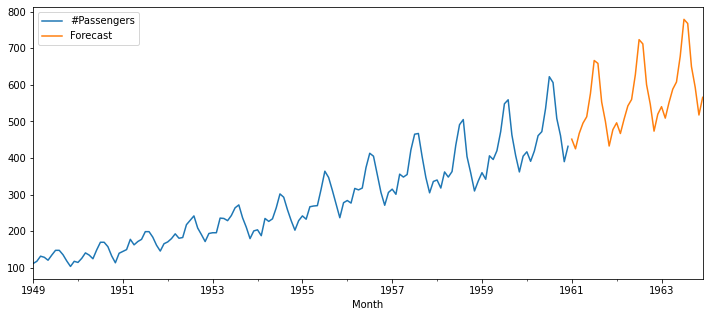

In [19]:
#ARIMA Model Forecast

# Train model 
model = model = SARIMAX(airline['#Passengers'],  order = (0, 1, 1), seasonal_order =(2, 1, 1, 12)) 
result = model.fit() 

# Forecast for the next 3 years 
forecast = result.predict(start = len(airline), end = (len(airline)-1) + 3 * 12, typ = 'levels').rename('Forecast') 

# Plot the forecast values 
airline['#Passengers'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 